<a href="https://colab.research.google.com/github/necmigunduz/second_ai_try/blob/main/second_ai_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn #PyTorch blocks for Neural Network
import matplotlib.pyplot as plt
torch.__version__

'2.3.1+cu121'

In [2]:
## Data: Preparing and loading
# Known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

# Create a line function
y = bias + weight * X

# Length
len(X), len(y)

(50, 50)

In [3]:
### Split data into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

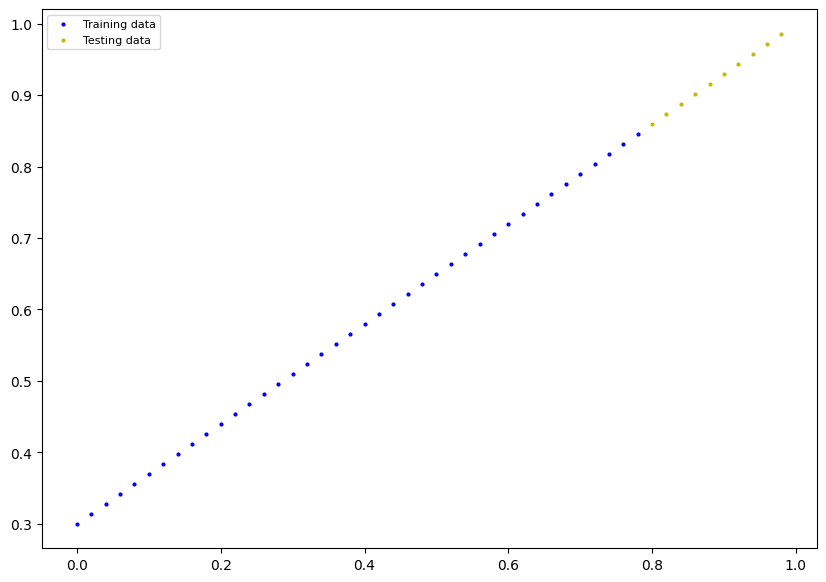

In [4]:
### Plot
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="y", s=4, label="Testing data")

    # Plot the predictions in red (predictions were made on the test data)
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 8})

plot_predictions(X_train, y_train, X_test, y_test)

In [5]:
### PyTorch model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

# Gradiend Descent & Backpropagation

### PyTorch Model Building Essentials
* torch.nn
* torch.nn.Parameter
* torch.nn.Module
* torch.optim
* def forward()
* torch.utils.data.Dataset
* torch.utils.data.DataLoader
* torch.vision.models
* torch.utils.tensorboard

For more info: https://pytorch.org/tutorials/beginner/ptcheat.html


In [6]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [7]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
### Predictions with `torch.inference_mode()` or `torch.no_grad()`
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

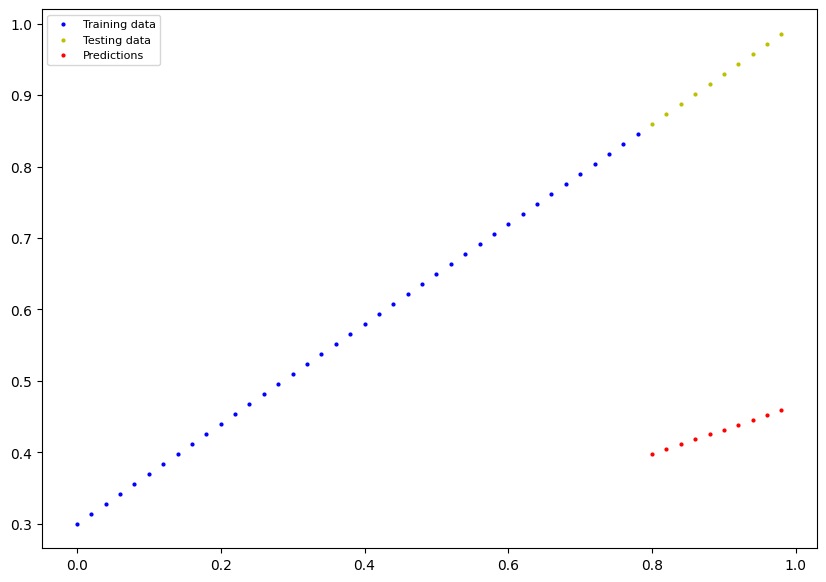

In [9]:
plot_predictions(predictions=y_preds)

In [10]:
y_preds_2 = model_0(X_test)
y_preds_2, y_preds

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]], grad_fn=<AddBackward0>),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

### Train A Model

* Lost Function or Cost Function
* `torch.nn` has built-in loss functions
* Optimizer
* training loop and testing loop

In [11]:
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [12]:
### Setup a loss function
loss_fn = nn.L1Loss()

### Setup an optimizer
Optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Back propagation
5. Gradint descent

In [13]:
with torch.no_grad(): # or with torch.inference_mode():
  list(model_0.parameters())


In [18]:
# An epoch is one loop through the data...
epochs = 1

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training model
  model_0.train() # sets all parameters gradients required.

# 1. Forward pass
  y_preds = model_0(X_train)

# 2. Loss
  loss = loss_fn(y_preds, y_train)

# 3. Optimizer zero grad
  Optimizer.zero_grad()

# 4. Back propagation
  loss.backward()

# 5. Gradient descent
  Optimizer.step()
  model_0.eval() # turns off gradient tracking

